
*****************************************
***** UBER SUPPLY DEMAND CASE STUDY *****
*****************************************

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib.get_backend()


In [3]:
#Import the dataset for uber supply demand case study
uber_df = pd.read_csv("C:/Users/aishwarr/Documents/Upgrad/Uber Supply and Demand/Uber Request Data.csv")

In [4]:
#Get the information of the dataset
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [5]:
#View the dataset
uber_df.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [6]:
#Check the column names
uber_df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [7]:
#Check the total number of rows and columns
uber_df.shape

(6745, 6)

In [8]:
#Upon analysing it is found that there are two different types of Date formats##

##Convert them to standard %d-%m-%Y %H:%M:%S format##

uber_df['Request timestamp'] = uber_df['Request timestamp'].apply(lambda x: pd.to_datetime(x).strftime('%d-%m-%Y %H:%M:%S'))
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].fillna("12-12-12 12:12:12")
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].apply(lambda x: pd.to_datetime(x).strftime('%d-%m-%Y %H:%M:%S'))
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].replace("12-12-2012 12:12:12", np.NaN)


In [9]:
#Once it is all in same format, convert it to Date Time datatype##
#Sort Request time in ascending for easier analysis#

uber_df['Request timestamp']=pd.to_datetime(uber_df['Request timestamp'])
uber_df['Drop timestamp']=pd.to_datetime(uber_df['Drop timestamp'])
uber_df = uber_df.sort_values(by='Request timestamp',ascending=True)

In [10]:
#When no cars are available, there is no Driver ID. So replace it with "0"##
##Also convert the datatype to INT##

uber_df['Driver id'] = uber_df['Driver id'].fillna(0)
uber_df['Driver id'] = uber_df['Driver id'].astype(int)

In [11]:
##Check if the data type has changed##
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 1303 to 2401
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null int32
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 342.5+ KB


In [12]:
#Check the percent of null values##
100*(uber_df.isnull().sum()/len(uber_df.index))

## Drop Timestamp null values cannot be substituted because it would interfere with Trip duration##

Request id            0.000000
Pickup point          0.000000
Driver id             0.000000
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [13]:
#Creating new columns from Request timestamp, namely the request date and request hour##

uber_df['Req_day']=uber_df['Request timestamp'].apply(lambda x: x.day)
uber_df['Req_hour']=uber_df['Request timestamp'].apply(lambda x: x.hour)


In [14]:
#Calculate the  difference between the Drop time and Request Time to get the "Duration of the whole trip"##


uber_df['Duration']=uber_df['Drop timestamp']-uber_df['Request timestamp']
## Convert the difference to minutes##
uber_df['Duration']=uber_df['Duration'].astype('timedelta64[m]')
uber_df['Duration'] = uber_df['Duration'].fillna(-1)
uber_df['Duration'] = uber_df['Duration'].astype(int)
uber_df['Duration'] = uber_df['Duration'].astype(str)
uber_df['Duration'] = uber_df['Duration'].replace('-1', np.NaN)
uber_df.head(5)



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_day,Req_hour,Duration
1303,1363,Airport,136,Trip Completed,2016-07-11 00:00:00,2016-07-11 01:11:00,11,0,71
4095,1362,City,0,No Cars Available,2016-07-11 00:02:00,NaT,11,0,NaN
1462,1367,City,155,Trip Completed,2016-07-11 00:05:00,2016-07-11 01:06:00,11,0,61
4096,1364,City,0,No Cars Available,2016-07-11 00:06:00,NaT,11,0,NaN
4097,1366,City,0,No Cars Available,2016-07-11 00:09:00,NaT,11,0,NaN


In [15]:
#Get different Time Slots of the day : Peak Morning hours, Peak Evening hours and Non Peak Hours
uber_df['Time_Slot']=uber_df['Req_hour'].apply(lambda x: "Peak_Hour_Morning" if (x>5 and x<11) else ("Peak_Hour_Evening" if (x>16 and x<23) else "Non_Peak_Hour"))
uber_df['Time_Slot']=uber_df['Time_Slot'].astype(str)

In [16]:
#Check the dataframe##
uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req_day,Req_hour,Duration,Time_Slot
1303,1363,Airport,136,Trip Completed,2016-07-11 00:00:00,2016-07-11 01:11:00,11,0,71,Non_Peak_Hour
4095,1362,City,0,No Cars Available,2016-07-11 00:02:00,NaT,11,0,NaN,Non_Peak_Hour
1462,1367,City,155,Trip Completed,2016-07-11 00:05:00,2016-07-11 01:06:00,11,0,61,Non_Peak_Hour
4096,1364,City,0,No Cars Available,2016-07-11 00:06:00,NaT,11,0,NaN,Non_Peak_Hour
4097,1366,City,0,No Cars Available,2016-07-11 00:09:00,NaT,11,0,NaN,Non_Peak_Hour
3791,1365,City,229,Cancelled,2016-07-11 00:09:00,NaT,11,0,NaN,Non_Peak_Hour
2700,1,Airport,285,Trip Completed,2016-07-11 00:20:00,2016-07-11 00:51:00,11,0,31,Non_Peak_Hour
4098,2,Airport,0,No Cars Available,2016-07-11 00:23:00,NaT,11,0,NaN,Non_Peak_Hour
776,3,Airport,80,Trip Completed,2016-07-11 00:24:00,2016-07-11 01:31:00,11,0,67,Non_Peak_Hour
4099,7,Airport,0,No Cars Available,2016-07-11 00:30:00,NaT,11,0,NaN,Non_Peak_Hour


C:\Users\aishwarr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


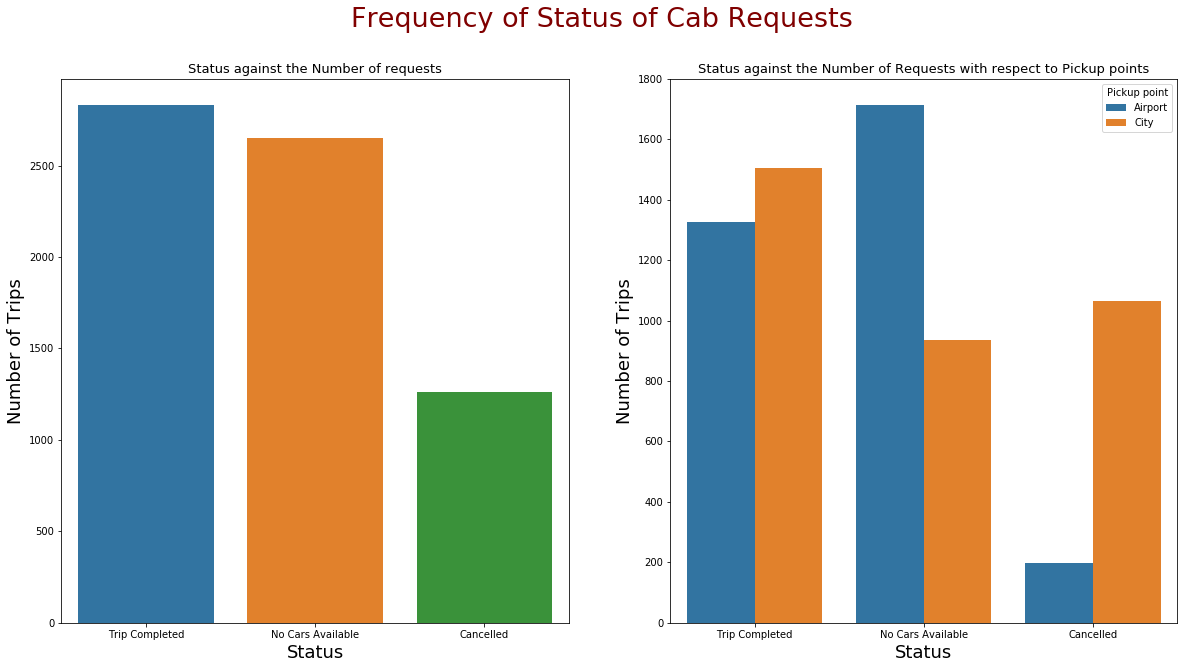

In [17]:
##Plotting sub plots to compare side by side##

#First plot  shows the frequency of the status of cab requests##
##Second plot shows frequency of status with respect to the pick up point##

fig, ax =plt.subplots(1,2,figsize=(20,10))
fig.suptitle("Frequency of Status of Cab Requests",fontsize=27, color = "maroon")
sns.countplot(x=uber_df['Status'],ax=ax[0]).set_title("Status against the Number of requests",fontsize=13)
sns.countplot(x=uber_df['Status'],hue=uber_df['Pickup point'],ax=ax[1]).set_title("Status against the Number of Requests with respect to Pickup points",fontsize=13)
ax[0].set_xlabel('Status',fontsize=18, color="black")
ax[1].set_xlabel('Status',fontsize=18, color="black")
ax[0].set_ylabel('Number of Trips',fontsize=18, color="black")
ax[1].set_ylabel('Number of Trips',fontsize=18, color="black")
fig.show()
fig.savefig('Plot1.png')


     **Ananlysis drawn**

* From the first plot we can draw a conclusion that though number of trips completed has the highest frequency, the frequency of no cars available and cancelled trips is more than 50%.
* From the second plot we can draw a conclusion that, frequency of no cars available is higher when the pickup is from Airport and that frequency of cancellations is higher when the pickup is from City.
* Hence, we can easily conclude there is a supply and demand gap.

C:\Users\aishwarr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


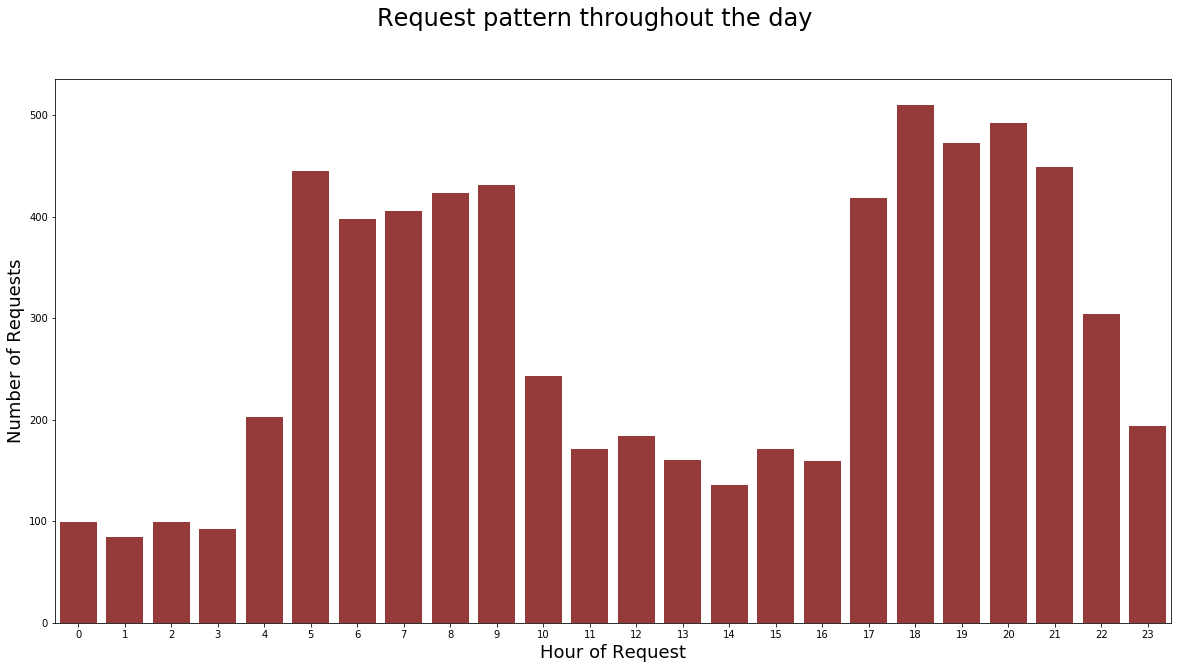

In [18]:
##Further analyzing the cab request pattern throughout the day##

fig, ax =plt.subplots(1,1,figsize=(20,10))
fig.suptitle("Request pattern throughout the day",fontsize=24)
sns.countplot(x=uber_df['Req_hour'],color='brown')
ax.set_xlabel('Hour of Request',fontsize=18, color="black")
ax.set_ylabel('Number of Requests',fontsize=18, color="black")
fig.show()
fig.savefig('Plot2.png')



     **Ananlysis drawn**

* From the above graph we can see that, 
    The frequency of cab requests starts from 5 in the morning to 10 in the morning which is considered as Morning Peak Hours.
    The frequency of cab requests starts from 5 in the evening to 10 in the evening which is considered as Evening Peak Hours


C:\Users\aishwarr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


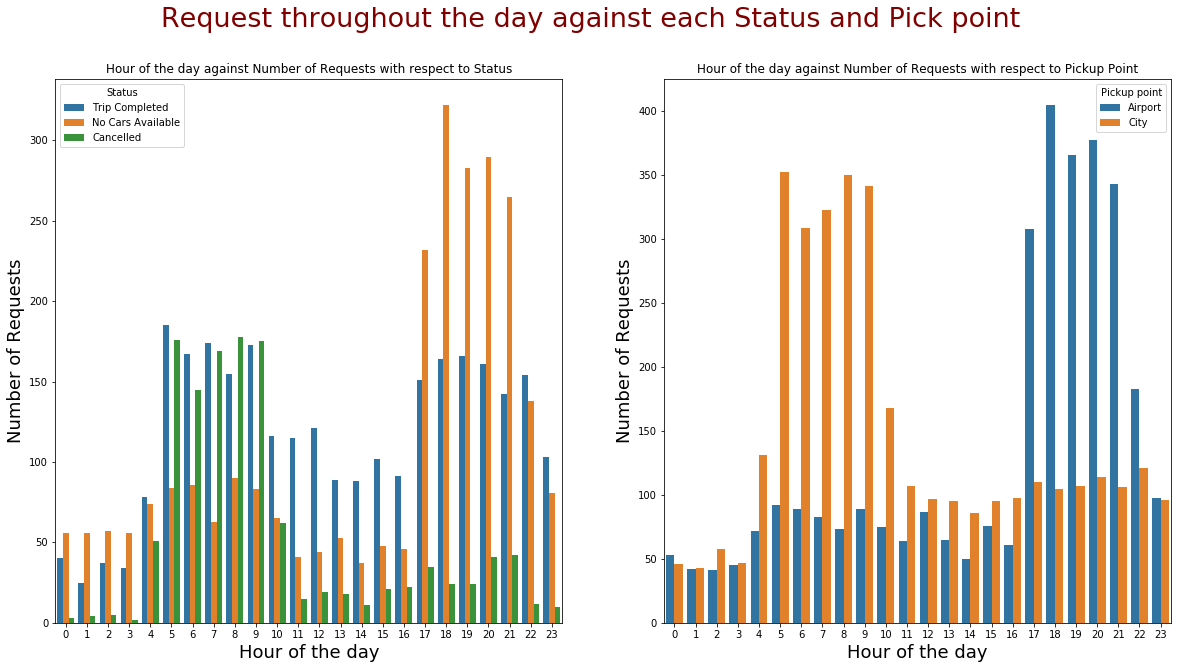

In [19]:
## Plot to analyze the Request throughout the day against each Status and Pick point
fig, ax =plt.subplots(1,2,figsize=(20,10))
fig.suptitle("Request throughout the day against each Status and Pick point ",fontsize=27, color="maroon")
sns.countplot(uber_df['Req_hour'],hue=uber_df['Status'],ax=ax[0]).set_title("Hour of the day against Number of Requests with respect to Status",fontsize=12)
sns.countplot(uber_df['Req_hour'],hue=uber_df['Pickup point'],ax=ax[1]).set_title("Hour of the day against Number of Requests with respect to Pickup Point",fontsize=12)
ax[0].set_xlabel('Hour of the day',fontsize=18, color="black")
ax[1].set_xlabel('Hour of the day',fontsize=18, color="black")
ax[0].set_ylabel('Number of Requests',fontsize=18, color="black")
ax[1].set_ylabel('Number of Requests',fontsize=18, color="black")
fig.show()
fig.savefig('Plot3.png')


     **Ananlysis drawn**

* From the plot 1 we can see that, the frequency of cancellation is high during Morning peak hours and frequency of No cars available is high during Evening Peak Hours
* From the plot 2 we can see that, the frequency of cab requests is high from City during Morning Peak Hours and the frequency of cab requests is high from Airport during Evening Peak Hours 


In [20]:
##A new DF is created which comprises only the Completed trips##
##This will be used to plot Duration of the Trip against the hour of the day##

Completed_trips=uber_df.loc[(uber_df['Status']=="Trip Completed")]
Completed_trips['Duration']=Completed_trips['Duration'].astype(int)

C:\Users\aishwarr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


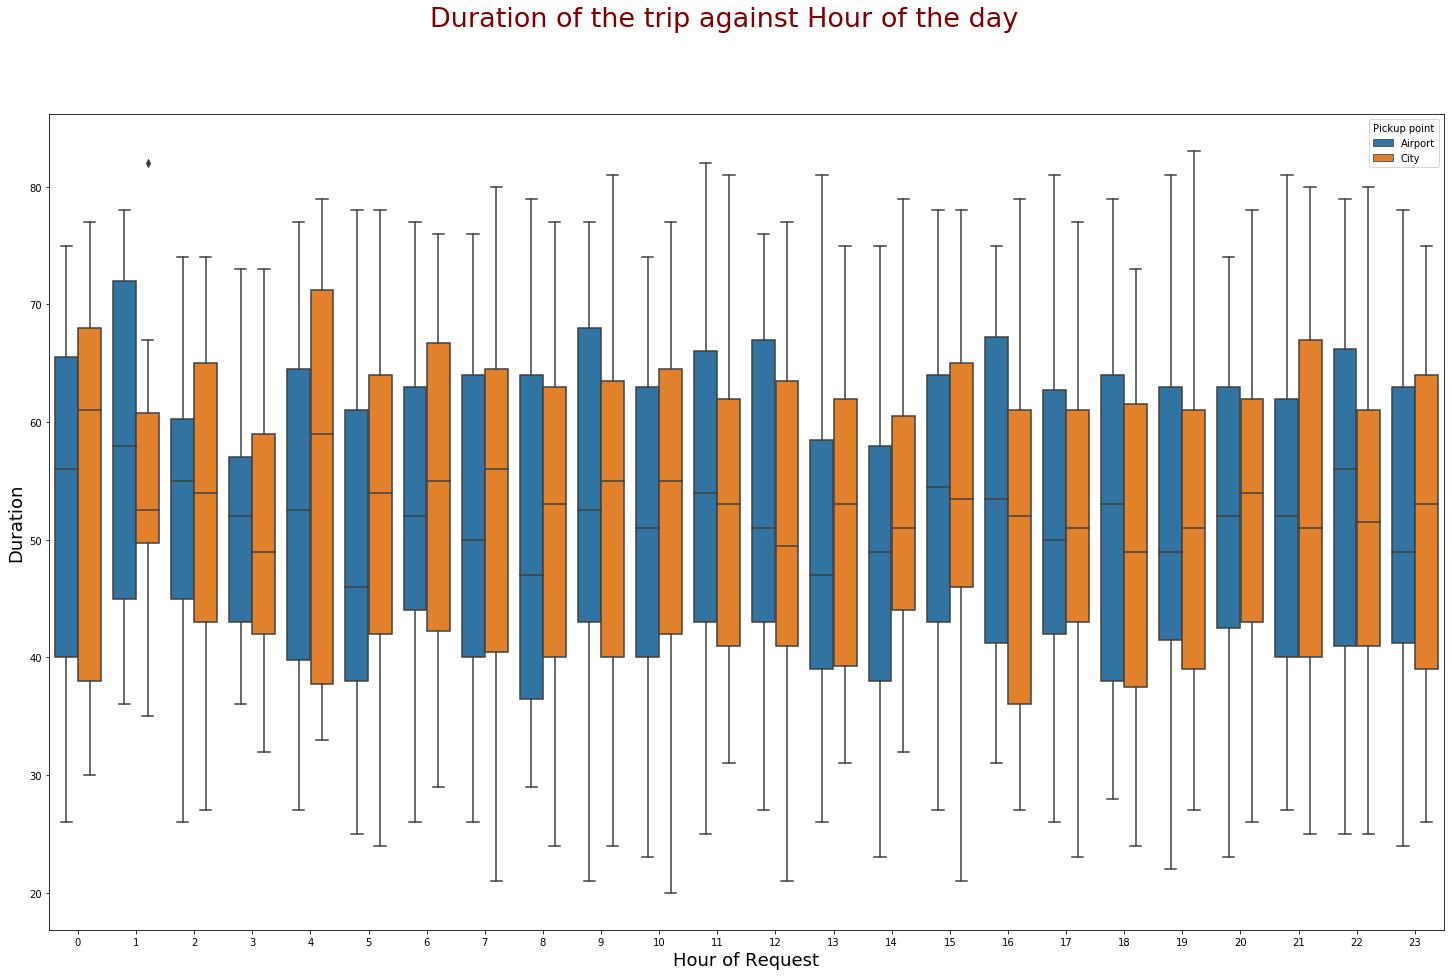

In [21]:
##Box Plot to analyze the Trip duration for Airport and City request against each hour of the day##

fig, ax =plt.subplots(1,1,figsize=(25,15))
fig.suptitle("Duration of the trip against Hour of the day",fontsize=27, color="maroon")
sns.boxplot(x=Completed_trips['Req_hour'],y=Completed_trips['Duration'],hue=Completed_trips['Pickup point'])
ax.set_xlabel('Hour of Request',fontsize=18, color="black")
ax.set_ylabel('Duration',fontsize=18, color="black")
fig.show()
fig.savefig('Plot4.png')

     **Ananlysis drawn**

* From Airport to City **Average trip duration**  is high during Evening Peak Hours and from City to Airport average trip duration is high during Morning Peak Hours
* From the above analysis we can easily conclude that higher **Average trip duration**  from City to Airport is the reason for high cancellations. 
* Also considering the fact that no cars are available during Evening Peak Hours from Airport to City, we can conclude that the **Average trip duration** from Airport to City is not a problem in this case.



In [22]:
##Two new DFs are created which comprises Pickups from Airport and Pickups from City##

AirportPickup=uber_df.loc[(uber_df['Pickup point']=="Airport")]
CityPickup=uber_df.loc[(uber_df['Pickup point']=="City")]

C:\Users\aishwarr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


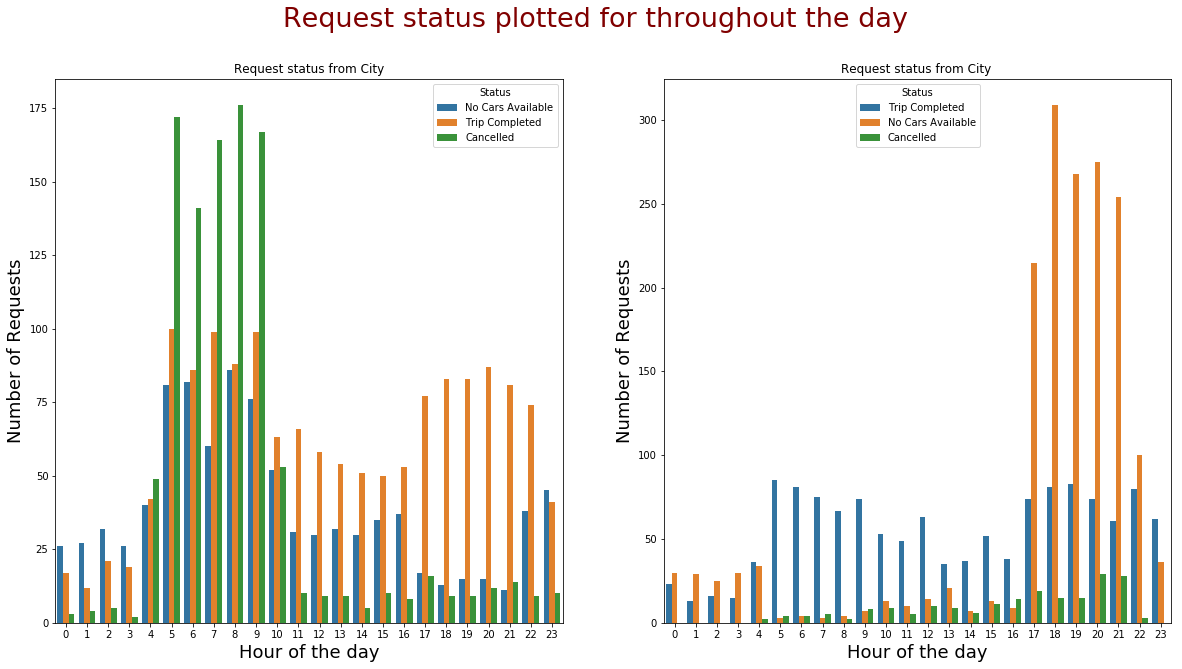

In [23]:
##Plot to analyze request status from City and Airport

fig, ax =plt.subplots(1,2,figsize=(20,10))
fig.suptitle("Request status plotted for throughout the day",fontsize=27, color="maroon")
sns.countplot(AirportPickup['Req_hour'],hue=AirportPickup['Status'],ax=ax[1]).set_title("Request status from City ",fontsize=12)
sns.countplot(CityPickup['Req_hour'],hue=CityPickup['Status'],ax=ax[0]).set_title("Request status from City",fontsize=12)
ax[0].set_xlabel('Hour of the day',fontsize=18, color="black")
ax[1].set_xlabel('Hour of the day',fontsize=18, color="black")
ax[0].set_ylabel('Number of Requests',fontsize=18, color="black")
ax[1].set_ylabel('Number of Requests',fontsize=18, color="black")
fig.show()
fig.savefig('Plot5.png')

     **Ananlysis drawn**
 
 * From plot 1:
     Morning Peak Hours there is lot of Cancellations from the City .
 * From plot 2:
     Evening Peak Hours frequency of No cabs available is high from the Airport .
 * Hence, we can easily conclude that Cancellation is the issue during Morning Peak Hours from City and that No cabs available is the issue during Evening Peak Hours from Airport.
 

In [24]:
##DFs to get the supply and demand 

demand_PeakHour=uber_df.loc[(~uber_df['Time_Slot'].str.contains("Non_Peak_Hour"))]
demand_PeakHour=demand_PeakHour.groupby(['Status', 'Pickup point']).size().reset_index().pivot(columns='Status', index='Pickup point', values=0)
supply_PeakHour=uber_df.loc[(~uber_df['Time_Slot'].str.contains("Non_Peak_Hour")) & (uber_df['Status']=="Trip Completed")]
supply_PeakHour=supply_PeakHour.groupby(['Status', 'Pickup point']).size().reset_index().pivot(columns='Status', index='Pickup point', values=0)

C:\Users\aishwarr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


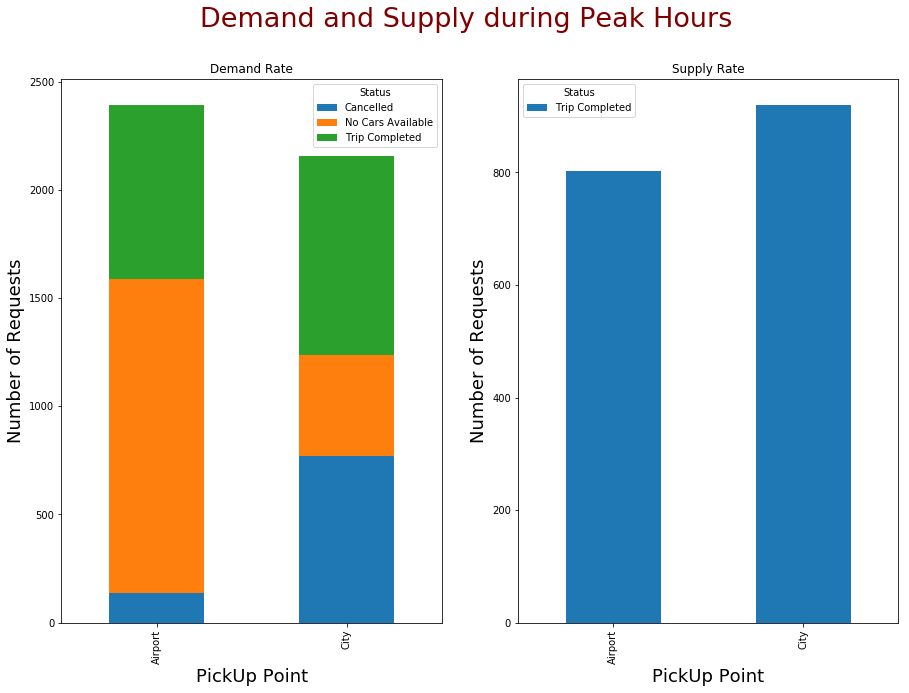

In [25]:
##Plot to analyze Demand and Supply during Peak Hours

fig, ax =plt.subplots(1,2,figsize=(15,10))
fig.suptitle("Demand and Supply during Peak Hours",fontsize=27, color="maroon")
demand_PeakHour.plot(kind='bar',stacked=True,ax=ax[0]).set_title("Demand Rate",fontsize=12)
supply_PeakHour.plot(kind='bar',stacked=True,ax=ax[1]).set_title("Supply Rate",fontsize=12)
ax[0].set_xlabel('PickUp Point',fontsize=18, color="black")
ax[1].set_xlabel('PickUp Point',fontsize=18, color="black")
ax[0].set_ylabel('Number of Requests',fontsize=18, color="black")
ax[1].set_ylabel('Number of Requests',fontsize=18, color="black")
fig.show()
fig.savefig('Plot6.png')

     **Ananlysis drawn**
 
 * From both the plots we can conclude thast there is a huge gap between supply and demand during the Peak hours of the day
 

In [26]:
##DFs to get the Cancellations and No car availibity from Airport and city

Cancellation=uber_df.loc[(uber_df['Status']=="Cancelled")]
Cancellation_Airport=uber_df.loc[((uber_df['Status']=="Cancelled") & (uber_df['Pickup point']=="Airport"))]
Cancellation_City=uber_df.loc[((uber_df['Status']=="Cancelled") & (uber_df['Pickup point']=="City"))]
NoCars=uber_df.loc[(uber_df['Status']=="No Cars Available")]
NoCars_Airport=uber_df.loc[((uber_df['Status']=="No Cars Available") & (uber_df['Pickup point']=="Airport"))]
NoCars_City=uber_df.loc[((uber_df['Status']=="No Cars Available") & (uber_df['Pickup point']=="City"))]
Cancellation=Cancellation.groupby(['Time_Slot','Pickup point']).size().reset_index().pivot(columns='Time_Slot', index='Pickup point', values=0)
NoCars=NoCars.groupby(['Time_Slot','Pickup point']).size().reset_index().pivot(columns='Time_Slot', index='Pickup point', values=0)

C:\Users\aishwarr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


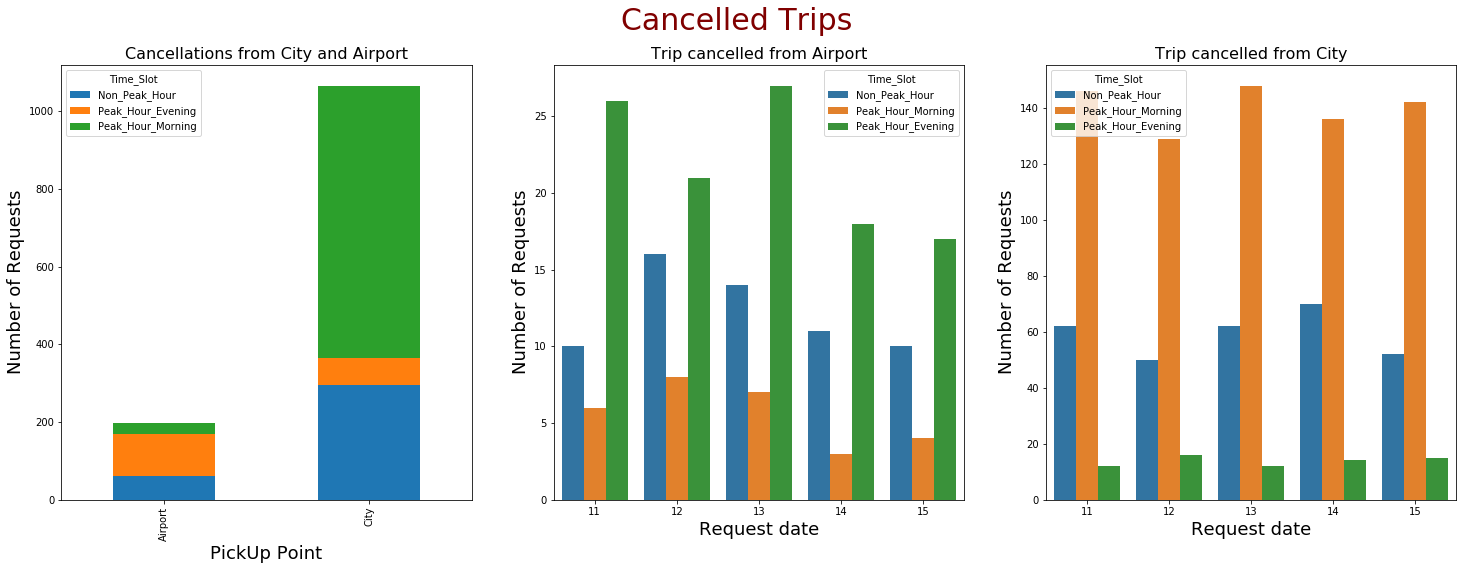

In [27]:
##Plot to analyze cancelled trips from city and airport

fig, ax =plt.subplots(1,3,figsize=(25,8))
fig.suptitle("Cancelled Trips",fontsize=30,color="maroon")
Cancellation.plot(kind='bar',stacked=True,ax=ax[0]).set_title("Cancellations from City and Airport",fontsize=16)
sns.countplot(Cancellation_Airport['Req_day'],hue=Cancellation_Airport['Time_Slot'],ax=ax[1]).set_title("Trip cancelled from Airport",fontsize=16)
sns.countplot(Cancellation_City['Req_day'],hue=Cancellation_City['Time_Slot'],ax=ax[2]).set_title("Trip cancelled from City",fontsize=16)
ax[0].set_xlabel('PickUp Point',fontsize=18, color="black")
ax[1].set_xlabel('Request date',fontsize=18, color="black")
ax[2].set_xlabel('Request date',fontsize=18, color="black")
ax[0].set_ylabel('Number of Requests',fontsize=18, color="black")
ax[1].set_ylabel('Number of Requests',fontsize=18, color="black")
ax[2].set_ylabel('Number of Requests',fontsize=18, color="black")

fig.show()
fig.savefig('Plot7.png')

C:\Users\aishwarr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


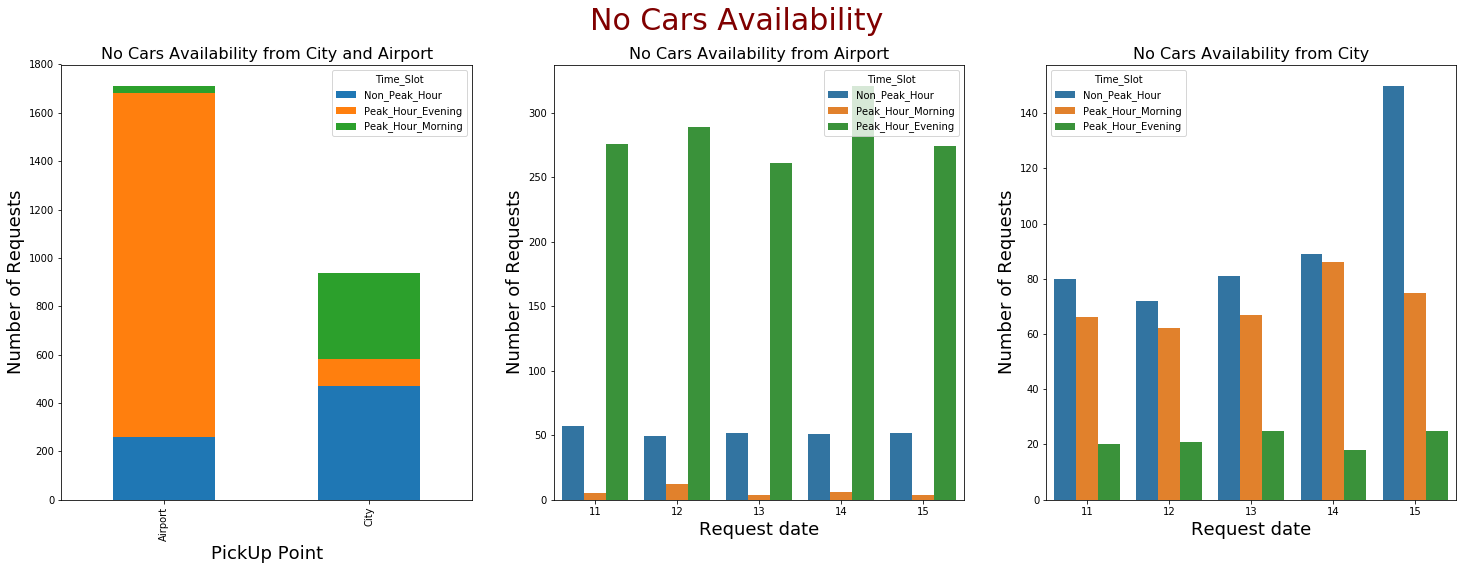

In [28]:
##Plot to analyse No Cars Availability  trips from city and airport

fig, ax =plt.subplots(1,3,figsize=(25,8))
fig.suptitle("No Cars Availability",fontsize=30, color="maroon")
NoCars.plot(kind='bar',stacked=True,ax=ax[0]).set_title("No Cars Availability from City and Airport",fontsize=16,)
sns.countplot(NoCars_Airport['Req_day'],hue=NoCars_Airport['Time_Slot'],ax=ax[1]).set_title("No Cars Availability from Airport",fontsize=16)
sns.countplot(NoCars_City['Req_day'],hue=NoCars_City['Time_Slot'],ax=ax[2]).set_title("No Cars Availability from City",fontsize=16)
ax[0].set_xlabel('PickUp Point',fontsize=18, color="black")
ax[1].set_xlabel('Request date',fontsize=18, color="black")
ax[2].set_xlabel('Request date',fontsize=18, color="black")
ax[0].set_ylabel('Number of Requests',fontsize=18, color="black")
ax[1].set_ylabel('Number of Requests',fontsize=18, color="black")
ax[2].set_ylabel('Number of Requests',fontsize=18, color="black")

fig.show()
fig.savefig('Plot8.png')

     **Ananlysis drawn**
 
 * From the above set of plots, following is the analysis
 
     *Cancellation Plots shows that cancellation issue is retsricted to city pickups and it persists throughout the dates given in the dataset
     *No Cars Availibilty Plots shows that unavailibilty of cars is retsricted to airport pickups and it persists throughout the dates given in the dataset
 